# Optimal new generation - summary

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
import re
import geopandas as gpd
from shapely.geometry import Point, Polygon

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format

### Notebook constants

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190", "scenario_191", "scenario_192", "scenario_193", "scenario_194", "scenario_195", "scenario_196", "scenario_197",
                 "scenario_198", "scenario_199"]
savefig = False
folder_to_save_results="results/"
figure_names={"scenario_190": 1, "scenario_191": 2, "scenario_192": 3, "scenario_193": 4, "scenario_194" : 5, "scenario_195": 6,
              "scenario_196" : 9, "scenario_197" : 8, "scenario_198" : 9, "scenario_199": 10}

In [3]:
# Name of output/input file to read
fname = "gen_cap.csv"

columns = [
    "GENERATION_PROJECT",
    "PERIOD",
    "gen_tech",
    "gen_load_zone",
    "GenCapacity",
]

#Get buildGen csv
gen_cap = get_data_sftp(hostname, username, scenario_name, fname, usecols=columns)
gen_cap=gen_cap.replace({"scenario": figure_names})
gen_cap = gen_cap.astype({'scenario':'int'})
gen_cap = gen_cap.astype({'GENERATION_PROJECT':'int'})
gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2020,Wind,CA_SCE_CEN,0.00,Wind,1
1,77333,2030,Wind,CA_SCE_CEN,0.00,Wind,1
2,77333,2040,Wind,CA_SCE_CEN,43.00,Wind,1
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
4,77334,2020,Wind,CA_SCE_CEN,0.00,Wind,1
...,...,...,...,...,...,...,...
36433,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,10
36434,1300000199,2020,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10
36435,1300000199,2030,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10
36436,1300000199,2040,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10


In [4]:
gen_cap = gen_cap[gen_cap['PERIOD'] == 2050]
gen_cap

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
7,77334,2050,Wind,CA_SCE_CEN,50.00,Wind,1
11,77335,2050,Wind,CA_SCE_CEN,49.00,Wind,1
15,77336,2050,Wind,CA_SCE_CEN,92.00,Wind,1
19,77337,2050,Wind,CA_SCE_CEN,66.00,Wind,1
...,...,...,...,...,...,...,...
36421,1300000195,2050,Offshore_Wind,CA_PGE_S,338.89,Offshore_Wind,10
36425,1300000196,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,10
36429,1300000197,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,10
36433,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,10


In [5]:
usa = gpd.read_file('/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/shape_files/states/states.shp')
usa.head()
usa ['coords'] = usa ['geometry'].apply(lambda x: x.representative_point().coords[:])
usa ['coords'] = [coords[0] for coords in usa['coords']]

In [6]:
def dms_to_dd(lat):
    deg, minutes, seconds, direction =  re.split('[°\'"]', lat)
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in [' W', ' S'] else 1)

In [8]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V1 Work/NREL_sites_rep_area.csv'
sites=pd.read_csv(path)
sites.rename(columns={'switch_id':'GENERATION_PROJECT'}, inplace=True)
sites

,site,area_km2,cap_MW,lon,lat,loc_id,GENERATION_PROJECT
0,1,226.78,248.32,-124.82,48.32,121000,1300000000
1,2,327.65,358.78,-125.01,48.18,52000,1300000001
2,3,333.20,364.85,-124.91,48.07,110000,1300000002
3,4,260.46,285.21,-124.78,47.90,144000,1300000003
4,5,400.30,438.33,-124.54,47.83,211000,1300000004
...,...,...,...,...,...,...,...
195,96,78.81,86.30,-120.45,33.98,483000,1300000195
196,97,280.71,307.38,-119.14,34.09,422000,1300000196
197,98,397.64,435.42,-118.99,33.82,250000,1300000197
198,99,533.77,584.47,-120.01,33.51,297000,1300000198


In [132]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V1 Work/area_to_soi_matching.csv'
site_matching=pd.read_csv(path)
site_matching

,site,matching soi,load_zone,lat_soi,lon_soi,Site Name
0,1,0,WA_W,48.28,-124.77,Neah Bay 1
1,2,1,WA_W,48.19,-125.07,Neah Bay 2
2,3,2,WA_W,48.04,-124.92,La Push 1
3,4,3,WA_W,47.92,-124.70,La Push 2
4,5,4,WA_W,47.82,-124.58,La Push 3
...,...,...,...,...,...,...
95,96,95,CA_PGE_S,34.08,-120.46,Lompoc 8
96,97,96,CA_SCE_CEN,34.07,-119.19,Port Hueneme 1
97,98,97,CA_SCE_S,33.53,-118.87,Torrance
98,99,98,CA_SCE_CEN,33.28,-119.61,Port Hueneme 2


In [10]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V1 Work/sites_of_interest.csv'
sites_of_interest = pd.read_csv(path)
sites_of_interest

,,name,state,lat,lon,type,wc_lon,wc_lat,wc_id,es_lon,es_lat,es_id,energy,revenue
0,0,Neah Bay 1,WA,48.28,-124.77,sites_of_interest,-124.82,48.32,121000,-122.69,48.21,1186,858.75,159.21
1,1,Neah Bay 2,WA,48.19,-125.07,sites_of_interest,-125.01,48.18,52000,-123.01,47.09,2268,"1,112.81",190.55
2,2,La Push 1,WA,48.04,-124.92,sites_of_interest,-124.91,48.07,110000,-123.01,47.09,2268,"1,067.81",182.31
3,3,La Push 2,WA,47.92,-124.70,sites_of_interest,-124.78,47.90,144000,-123.01,47.09,2268,"1,035.71",175.13
4,4,La Push 3,WA,47.82,-124.58,sites_of_interest,-124.54,47.83,211000,-123.01,47.09,2268,0.21,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Lompoc 8,CA,34.08,-120.46,sites_of_interest,-120.45,33.98,483000,-120.43,34.53,3249,"1,064.01",192.84
96,96,Port Hueneme 1,CA,34.07,-119.19,sites_of_interest,-119.14,34.09,422000,-119.17,34.13,3941,54.21,73.90
97,97,Torrance,CA,33.53,-118.87,sites_of_interest,-118.99,33.82,250000,-118.39,33.85,4413,99.90,109.12
98,98,Port Hueneme 2,CA,33.28,-119.61,sites_of_interest,-120.01,33.51,297000,-119.17,34.13,3941,997.61,154.49


In [145]:
gen_cap_osw_wave = gen_cap.copy()
gen_cap_osw_wave = gen_cap_osw_wave[gen_cap_osw_wave['GENERATION_PROJECT'].isin(range(1300000000,1300000200))]
gen_cap_osw_wave.reset_index(inplace=True,drop=True)
gen_cap_osw_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,1300000000,2050,Wave,WA_W,0.00,Wave,1
1,1300000001,2050,Wave,WA_W,0.00,Wave,1
2,1300000002,2050,Wave,WA_W,0.00,Wave,1
3,1300000003,2050,Wave,WA_W,0.00,Wave,1
4,1300000004,2050,Wave,WA_W,0.00,Wave,1
...,...,...,...,...,...,...,...
1995,1300000195,2050,Offshore_Wind,CA_PGE_S,338.89,Offshore_Wind,10
1996,1300000196,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,10
1997,1300000197,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,10
1998,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,10


In [146]:
gen_cap_osw_wave = pd.merge(gen_cap_osw_wave, sites, on='GENERATION_PROJECT')
gen_cap_osw_wave.drop(columns={'cap_MW'},inplace=True)
gen_cap_osw_wave 

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id
0,1300000000,2050,Wave,WA_W,0.00,Wave,1,1,226.78,-124.82,48.32,121000
1,1300000000,2050,Wave,WA_W,0.00,Wave,2,1,226.78,-124.82,48.32,121000
2,1300000000,2050,Wave,WA_W,0.00,Wave,3,1,226.78,-124.82,48.32,121000
3,1300000000,2050,Wave,WA_W,248.32,Wave,4,1,226.78,-124.82,48.32,121000
4,1300000000,2050,Wave,WA_W,248.32,Wave,5,1,226.78,-124.82,48.32,121000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,6,100,434.36,-117.36,32.59,83000
1996,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,9,100,434.36,-117.36,32.59,83000
1997,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,8,100,434.36,-117.36,32.59,83000
1998,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,9,100,434.36,-117.36,32.59,83000


In [13]:
gen_cap_osw_wave_nonzero = gen_cap_osw_wave.copy()
gen_cap_osw_wave_nonzero = gen_cap_osw_wave_nonzero.loc[gen_cap_osw_wave_nonzero.GenCapacity > 0]
gen_cap_osw_wave_nonzero

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id
3,1300000000,2050,Wave,WA_W,248.32,Wave,4,1,226.78,-124.82,48.32,121000
4,1300000000,2050,Wave,WA_W,248.32,Wave,5,1,226.78,-124.82,48.32,121000
8,1300000000,2050,Wave,WA_W,248.32,Wave,9,1,226.78,-124.82,48.32,121000
9,1300000000,2050,Wave,WA_W,248.32,Wave,10,1,226.78,-124.82,48.32,121000
12,1300000001,2050,Wave,WA_W,358.78,Wave,3,2,327.65,-125.01,48.18,52000
...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,6,99,533.77,-120.01,33.51,297000
1986,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,9,99,533.77,-120.01,33.51,297000
1987,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,8,99,533.77,-120.01,33.51,297000
1988,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,9,99,533.77,-120.01,33.51,297000


In [121]:
# test=gen_cap_osw_wave_nonzero.copy()
# test=test.loc[test.tech_map=='Wave']
# test=gen_cap_osw_wave_nonzero.pivot_table(
#     index="scenario", columns="loc_id", values="tech_map", aggfunc=lambda x: len(x.unique()) )
# test

loc_id,52000,110000,121000,144000,213000,215000,232000,245000,269000,285000,...,589000,594000,603000,607000,608000,611000,616000,648000,653000,659000
scenario,,,,,,,,,,,,,,,,,,,,,
1,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,1.00,NaN,...,NaN,1.00,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00
2,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,NaN,1.00,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00
3,2.00,2.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,1.00,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00
4,2.00,2.00,2.00,2.00,NaN,1.00,1.00,NaN,1.00,1.00,...,NaN,NaN,NaN,1.00,1.00,NaN,NaN,1.00,2.00,1.00
5,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00
6,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,NaN,1.00
7,2.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,NaN,1.00
8,2.00,2.00,1.00,2.00,NaN,NaN,NaN,NaN,1.00,1.00,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00
9,2.00,2.00,2.00,2.00,NaN,1.00,1.00,NaN,1.00,1.00,...,NaN,1.00,NaN,1.00,1.00,NaN,NaN,1.00,2.00,1.00


In [116]:
# loc_ids = gen_cap_osw_wave['loc_id'].unique()
# for id in loc_ids:
#     gen_cap_osw_wave[]

In [76]:
gen_cap_wave = gen_cap_osw_wave[gen_cap_osw_wave['gen_tech'] == 'Wave']
gen_cap_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id
0,1300000000,2050,Wave,WA_W,0.00,Wave,1,1,226.78,-124.82,48.32,121000
1,1300000000,2050,Wave,WA_W,0.00,Wave,2,1,226.78,-124.82,48.32,121000
2,1300000000,2050,Wave,WA_W,0.00,Wave,3,1,226.78,-124.82,48.32,121000
3,1300000000,2050,Wave,WA_W,248.32,Wave,4,1,226.78,-124.82,48.32,121000
4,1300000000,2050,Wave,WA_W,248.32,Wave,5,1,226.78,-124.82,48.32,121000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1300000099,2050,Wave,CA_SDGE,0.00,Wave,6,100,434.36,-117.36,32.59,83000
996,1300000099,2050,Wave,CA_SDGE,0.00,Wave,9,100,434.36,-117.36,32.59,83000
997,1300000099,2050,Wave,CA_SDGE,0.00,Wave,8,100,434.36,-117.36,32.59,83000
998,1300000099,2050,Wave,CA_SDGE,0.00,Wave,9,100,434.36,-117.36,32.59,83000


In [77]:
gen_cap_wave.loc[:,'Total MW']=gen_cap_wave.apply(lambda x: sum(x[c] for c in ['GenCapacity']), axis=1)
gen_cap_wave.loc[:,'Project Capacity (MW)']=gen_cap_wave.apply(lambda x: (x['area_km2']*1.095), axis=1)
gen_cap_wave.loc[:,'Percent of Project Capacity Built']=gen_cap_wave.apply(lambda x: ((x['Total MW']/x['Project Capacity (MW)'])*100), axis=1)
gen_cap_wave

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_79034/1183389421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_cap_wave.loc[:,'Total MW']=gen_cap_wave.apply(lambda x: sum(x[c] for c in ['GenCapacity']), axis=1)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_79034/1183389421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_cap_wave.loc[:,'Project Capacity (MW)']=gen_cap_wave.apply(lambda x: (x['area_km2']*1.095), axis=1)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id,Total MW,Project Capacity (MW),Percent of Project Capacity Built
0,1300000000,2050,Wave,WA_W,0.00,Wave,1,1,226.78,-124.82,48.32,121000,0.00,248.32,0.00
1,1300000000,2050,Wave,WA_W,0.00,Wave,2,1,226.78,-124.82,48.32,121000,0.00,248.32,0.00
2,1300000000,2050,Wave,WA_W,0.00,Wave,3,1,226.78,-124.82,48.32,121000,0.00,248.32,0.00
3,1300000000,2050,Wave,WA_W,248.32,Wave,4,1,226.78,-124.82,48.32,121000,248.32,248.32,100.00
4,1300000000,2050,Wave,WA_W,248.32,Wave,5,1,226.78,-124.82,48.32,121000,248.32,248.32,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1300000099,2050,Wave,CA_SDGE,0.00,Wave,6,100,434.36,-117.36,32.59,83000,0.00,475.62,0.00
996,1300000099,2050,Wave,CA_SDGE,0.00,Wave,9,100,434.36,-117.36,32.59,83000,0.00,475.62,0.00
997,1300000099,2050,Wave,CA_SDGE,0.00,Wave,8,100,434.36,-117.36,32.59,83000,0.00,475.62,0.00
998,1300000099,2050,Wave,CA_SDGE,0.00,Wave,9,100,434.36,-117.36,32.59,83000,0.00,475.62,0.00


In [112]:
gen_cap_wave[gen_cap_wave['scenario'] == 3].head(82)

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id,Total MW,Project Capacity (MW),Percent of Project Capacity Built
2,1300000000,2050,Wave,WA_W,0.00,Wave,3,1,226.78,-124.82,48.32,121000,0.00,248.32,0.00
12,1300000001,2050,Wave,WA_W,358.78,Wave,3,2,327.65,-125.01,48.18,52000,358.78,358.78,100.00
22,1300000002,2050,Wave,WA_W,364.85,Wave,3,3,333.20,-124.91,48.07,110000,364.85,364.85,100.00
32,1300000003,2050,Wave,WA_W,285.21,Wave,3,4,260.46,-124.78,47.90,144000,285.21,285.21,100.00
42,1300000004,2050,Wave,WA_W,0.00,Wave,3,5,400.30,-124.54,47.83,211000,0.00,438.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1300000077,2050,Wave,CA_PGE_CEN,0.00,Wave,3,78,400.76,-122.08,36.59,529000,0.00,438.83,0.00
782,1300000078,2050,Wave,CA_PGE_CEN,0.00,Wave,3,79,416.00,-122.00,36.49,550000,0.00,455.52,0.00
792,1300000079,2050,Wave,CA_PGE_CEN,0.00,Wave,3,80,211.32,-122.00,36.16,443000,0.00,231.40,0.00
802,1300000080,2050,Wave,CA_PGE_CEN,101.53,Wave,3,81,245.01,-122.00,36.16,443000,101.53,268.29,37.84


In [160]:
s1 = gen_cap_wave[gen_cap_wave['scenario']==1]
s2 = gen_cap_wave[gen_cap_wave['scenario']==2]
s3 = gen_cap_wave[gen_cap_wave['scenario']==3]
s4 = gen_cap_wave[gen_cap_wave['scenario']==4]
s5 = gen_cap_wave[gen_cap_wave['scenario']==5]
s6 = gen_cap_wave[gen_cap_wave['scenario']==6]
s7 = gen_cap_wave[gen_cap_wave['scenario']==7]
s8 = gen_cap_wave[gen_cap_wave['scenario']==8]
s9 = gen_cap_wave[gen_cap_wave['scenario']==9]
s10 = gen_cap_wave[gen_cap_wave['scenario']==10]

In [161]:
s1 = (pd.merge(s1, site_matching, on='site', how='left')).drop(columns={'site','lon','lat','load_zone'})
s2 = (pd.merge(s2, site_matching, on='site', how='left')).drop(columns={'site','lon','lat','load_zone'})
s3 = (pd.merge(s3, site_matching, on='site', how='left')).drop(columns={'site','lon','lat','load_zone'})
s4 = (pd.merge(s4, site_matching, on='site', how='left')).drop(columns={'site','lon','lat','load_zone'})
s5 = (pd.merge(s5, site_matching, on='site', how='left')).drop(columns={'site','lon','lat','load_zone'})

In [169]:
s1

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,area_km2,loc_id,Total MW,Project Capacity (MW),Percent of Project Capacity Built,matching soi,lat_soi,lon_soi,Site Name
0,1300000000,2050,Wave,WA_W,0.00,Wave,1,226.78,121000,0.00,248.32,0.00,0,48.28,-124.77,Neah Bay 1
1,1300000001,2050,Wave,WA_W,0.00,Wave,1,327.65,52000,0.00,358.78,0.00,1,48.19,-125.07,Neah Bay 2
2,1300000002,2050,Wave,WA_W,0.00,Wave,1,333.20,110000,0.00,364.85,0.00,2,48.04,-124.92,La Push 1
3,1300000003,2050,Wave,WA_W,0.00,Wave,1,260.46,144000,0.00,285.21,0.00,3,47.92,-124.70,La Push 2
4,1300000004,2050,Wave,WA_W,0.00,Wave,1,400.30,211000,0.00,438.33,0.00,4,47.82,-124.58,La Push 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1300000095,2050,Wave,CA_PGE_S,0.00,Wave,1,78.81,483000,0.00,86.30,0.00,95,34.08,-120.46,Lompoc 8
96,1300000096,2050,Wave,CA_SCE_CEN,0.00,Wave,1,280.71,422000,0.00,307.38,0.00,96,34.07,-119.19,Port Hueneme 1
97,1300000097,2050,Wave,CA_SCE_S,0.00,Wave,1,397.64,250000,0.00,435.42,0.00,97,33.53,-118.87,Torrance
98,1300000098,2050,Wave,CA_SCE_CEN,0.00,Wave,1,533.77,297000,0.00,584.47,0.00,98,33.28,-119.61,Port Hueneme 2


In [165]:
s1_sorted = ((s1.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
s2_sorted = ((s2.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
s3_sorted = ((s3.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
s4_sorted = ((s4.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
s5_sorted = ((s5.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)

In [166]:
s1_sorted = s1_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
s2_sorted = s2_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
s3_sorted = s3_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
s4_sorted = s4_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
s5_sorted = s5_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]

In [167]:
s3_sorted.head(50)

,Site of Interest,Site Name,Longitude,Latitude,Total MW,Percent of Project Capacity Built
0,62,Flumeville 2,-123.92,38.92,638.75,100.00
1,32,Reedsport,-124.28,43.69,598.88,100.00
2,98,Port Hueneme 2,-119.61,33.28,584.47,100.00
3,92,Lompoc 5,-120.90,34.36,574.67,100.00
4,82,Lucia 2,-122.04,35.88,517.45,100.00
5,48,Port Kenyon,-124.44,40.62,502.38,100.00
6,12,Seaside 1,-124.12,46.03,480.81,100.00
7,61,Flumeville 1,-124.26,38.93,466.52,100.00
8,93,Lompoc 6,-121.46,34.35,457.48,100.00
9,16,Rockaway Beach 1,-124.15,45.65,452.94,100.00


In [168]:
s1_sorted.to_csv('scenario_1_site_ranking.csv',index = True,index_label='Rank')
s2_sorted.to_csv('scenario_2_site_ranking.csv',index = True,index_label='Rank')
s3_sorted.to_csv('scenario_3_site_ranking.csv',index = True,index_label='Rank')
s4_sorted.to_csv('scenario_4_site_ranking.csv',index = True,index_label='Rank')
s5_sorted.to_csv('scenario_5_site_ranking.csv',index = True,index_label='Rank')

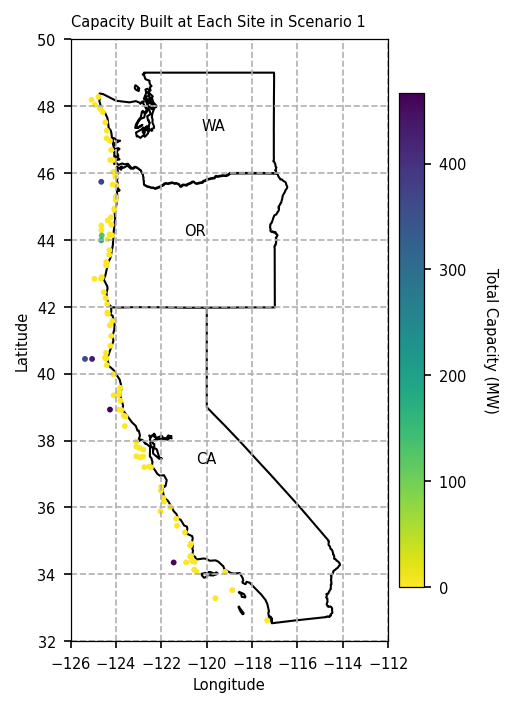

In [172]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = s1['lon_soi']
y = s1['lat_soi']
a = s1['Total MW'].min()
b = s1['Total MW'].max()
s = ax1.scatter(x, y, c = s1['Total MW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Capacity Built at Each Site in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')


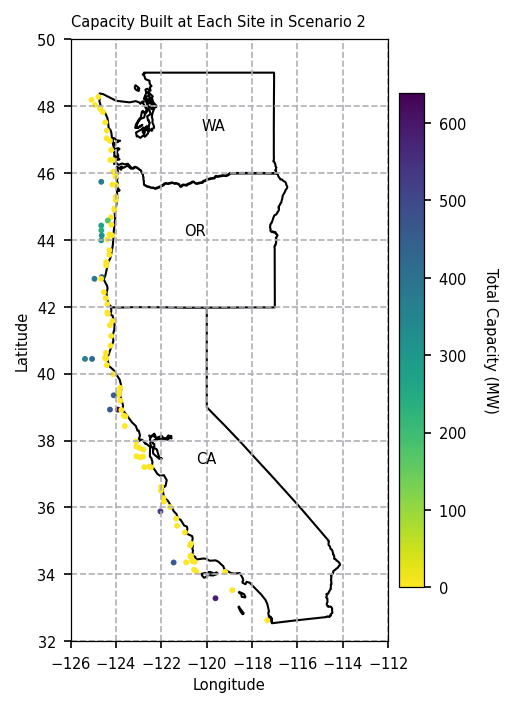

In [173]:
# Plot
fig, ax2 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
#sit = ax2.scatter(sites_of_interest['lon'],sites_of_interest['lat'], s =4)
x = s2['lon_soi']
y = s2['lat_soi']
a = s2['Total MW'].min()
b = s2['Total MW'].max()
s = ax2.scatter(x, y, c = s2['Total MW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax2.set_xlabel('Longitude',fontsize=7)
ax2.set_ylabel('Latitude',fontsize=7)
ax2.set_ylim(32,50)
ax2.set_title('Capacity Built at Each Site in Scenario 2')

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

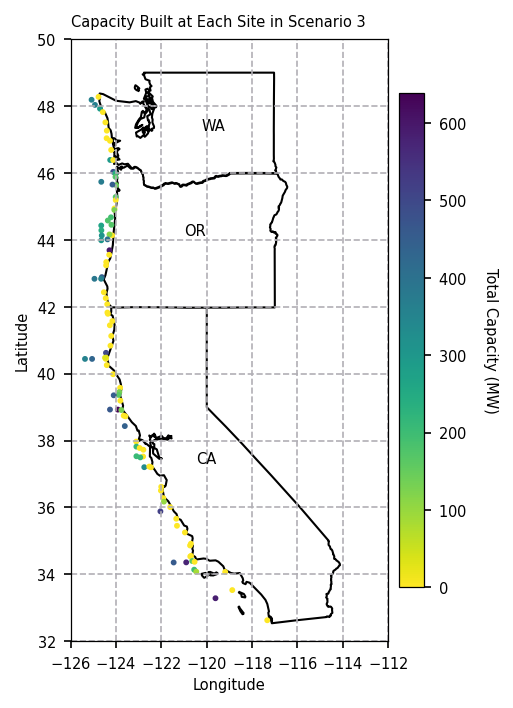

In [174]:
# Plot
fig, ax3 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax3.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)

x = s3['lon_soi']
y = s3['lat_soi']
a = s3['Total MW'].min()
b = s3['Total MW'].max()
s = ax3.scatter(x, y, c = s3['Total MW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax3,fraction=0.07, pad=0.03)
ax3.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
ax3.set_ylabel('Latitude',fontsize=7)
ax3.set_ylim(32,50)
ax3.set_title('Capacity Built at Each Site in Scenario 3')

# ax3.set_ylabel("Latitude")
# ax3.set_xlabel("Longitude")
ax3.grid(axis='y', linestyle='dashed')
ax3.grid(axis='x', linestyle='dashed')
#handles, labels = ax3.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax3.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

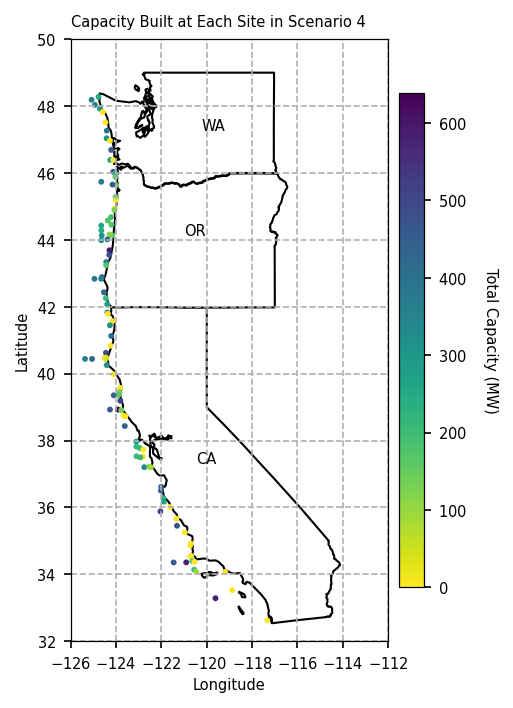

In [175]:
# Plot
fig, ax4 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax4.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)

x = s4['lon_soi']
y = s4['lat_soi']
a = s4['Total MW'].min()
b = s4['Total MW'].max()
s = ax4.scatter(x, y, c = s4['Total MW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax4,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax4.set_xlabel('Longitude',fontsize=7)
ax4.set_ylabel('Latitude',fontsize=7)
ax4.set_ylim(32,50)
ax4.set_title('Capacity Built at Each Site in Scenario 4')

# ax4.set_ylabel("Latitude")
# ax4.set_xlabel("Longitude")
ax4.grid(axis='y', linestyle='dashed')
ax4.grid(axis='x', linestyle='dashed')
#handles, labels = ax4.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax4.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

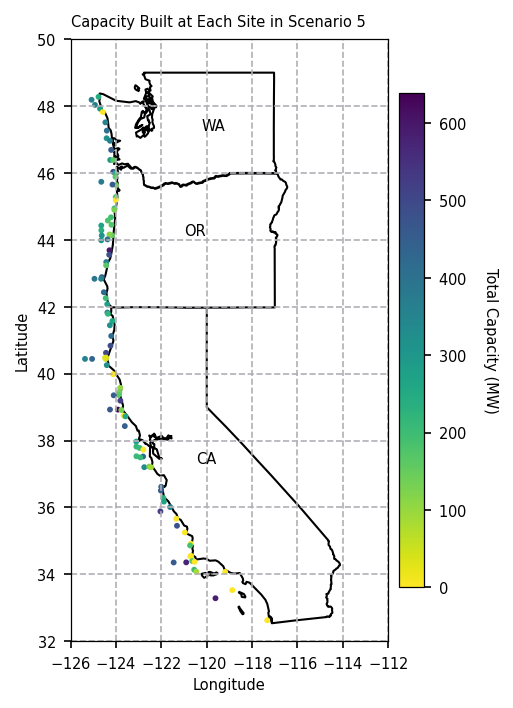

In [176]:
# Plot
fig, ax5 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax5.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)

x = s5['lon_soi']
y = s5['lat_soi']
a = s5['Total MW'].min()
b = s5['Total MW'].max()
s = ax5.scatter(x, y, c = s5['Total MW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax5,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax5.set_xlabel('Longitude',fontsize=7)
ax5.set_ylabel('Latitude',fontsize=7)
ax5.set_ylim(32,50)
ax5.set_title('Capacity Built at Each Site in Scenario 5')

# ax5.set_ylabel("Latitude")
# ax5.set_xlabel("Longitude")
ax5.grid(axis='y', linestyle='dashed')
ax5.grid(axis='x', linestyle='dashed')
#handles, labels = ax5.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax5.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [27]:
gen_cap_osw = gen_cap_osw_wave[gen_cap_osw_wave['gen_tech'] == 'Offshore_Wind']
gen_cap_osw

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site,area_km2,lon,lat,loc_id
1000,1300000100,2050,Offshore_Wind,WA_W,975.15,Offshore_Wind,1,1,226.78,-124.82,48.32,121000
1001,1300000100,2050,Offshore_Wind,WA_W,975.15,Offshore_Wind,2,1,226.78,-124.82,48.32,121000
1002,1300000100,2050,Offshore_Wind,WA_W,975.15,Offshore_Wind,3,1,226.78,-124.82,48.32,121000
1003,1300000100,2050,Offshore_Wind,WA_W,975.15,Offshore_Wind,4,1,226.78,-124.82,48.32,121000
1004,1300000100,2050,Offshore_Wind,WA_W,975.15,Offshore_Wind,5,1,226.78,-124.82,48.32,121000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,6,100,434.36,-117.36,32.59,83000
1996,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,7,100,434.36,-117.36,32.59,83000
1997,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,8,100,434.36,-117.36,32.59,83000
1998,1300000199,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,9,100,434.36,-117.36,32.59,83000


In [28]:
nonzero_cap = gen_cap_osw_wave[gen_cap_osw_wave['GenCapacity'] > 0]
nonzero_cap_osw = nonzero_cap[nonzero_cap['gen_tech']=='Offshore_Wind']
nonzero_cap_wave = nonzero_cap[nonzero_cap['gen_tech']=='Wave']
collocated_sites = pd.merge(nonzero_cap_osw, nonzero_cap_wave, how='inner', on=['lon', 'lat','scenario','site','area_km2','PERIOD','gen_load_zone'],suffixes=('_osw','_wave'))
collocated_sites.dropna(inplace=True)
collocated_sites.drop(columns={'tech_map_osw','tech_map_wave','gen_tech_osw','gen_tech_wave','loc_id_osw','loc_id_wave'},inplace=True)
collocated_sites.sort_values(by='scenario')

,GENERATION_PROJECT_osw,PERIOD,gen_load_zone,GenCapacity_osw,scenario,site,area_km2,lon,lat,GENERATION_PROJECT_wave,GenCapacity_wave
226,1300000186,2050,CA_PGE_S,"1,796.50",1,87,417.79,-121.34,34.07,1300000086,457.48
85,1300000152,2050,CA_PGE_N,"1,686.60",1,53,392.22,-125.10,40.55,1300000052,429.48
135,1300000161,2050,CA_PGE_N,"1,832.00",1,62,426.05,-124.33,38.90,1300000061,466.52
95,1300000153,2050,CA_PGE_N,"1,407.80",1,54,327.40,-125.10,40.55,1300000053,358.51
145,1300000162,2050,CA_PGE_N,"2,508.30",2,63,583.33,-123.91,38.89,1300000062,638.75
...,...,...,...,...,...,...,...,...,...,...,...
16,1300000102,2050,WA_W,"1,432.80",10,3,333.20,-124.91,48.07,1300000002,364.85
115,1300000157,2050,CA_PGE_N,525.38,10,58,122.18,-123.93,39.42,1300000057,133.79
109,1300000154,2050,CA_PGE_N,"1,280.70",10,55,297.84,-124.42,40.35,1300000054,326.14
104,1300000153,2050,CA_PGE_N,"1,407.80",10,54,327.40,-125.10,40.55,1300000053,358.51


In [29]:
collocated_sites.loc[:,'Total_GW']=collocated_sites.apply(lambda x: sum(x[c] for c in ['GenCapacity_osw','GenCapacity_wave'])/ 1e3, axis=1)
collocated_sites

,GENERATION_PROJECT_osw,PERIOD,gen_load_zone,GenCapacity_osw,scenario,site,area_km2,lon,lat,GENERATION_PROJECT_wave,GenCapacity_wave,Total_GW
0,1300000100,2050,WA_W,975.15,4,1,226.78,-124.82,48.32,1300000000,248.32,1.22
1,1300000100,2050,WA_W,975.15,5,1,226.78,-124.82,48.32,1300000000,248.32,1.22
2,1300000100,2050,WA_W,975.15,9,1,226.78,-124.82,48.32,1300000000,248.32,1.22
3,1300000100,2050,WA_W,975.15,10,1,226.78,-124.82,48.32,1300000000,248.32,1.22
4,1300000101,2050,WA_W,"1,408.90",3,2,327.65,-125.01,48.18,1300000001,358.78,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...
268,1300000198,2050,CA_SCE_CEN,"2,295.20",5,99,533.77,-120.01,33.51,1300000098,584.47,2.88
269,1300000198,2050,CA_SCE_CEN,"2,295.20",7,99,533.77,-120.01,33.51,1300000098,584.47,2.88
270,1300000198,2050,CA_SCE_CEN,"2,295.20",8,99,533.77,-120.01,33.51,1300000098,584.47,2.88
271,1300000198,2050,CA_SCE_CEN,"2,295.20",9,99,533.77,-120.01,33.51,1300000098,584.47,2.88


In [85]:
s1 = collocated_sites[collocated_sites['scenario']==1]
s2 = collocated_sites[collocated_sites['scenario']==2]
s3 = collocated_sites[collocated_sites['scenario']==3]
s4 = collocated_sites[collocated_sites['scenario']==4]
s5 = collocated_sites[collocated_sites['scenario']==5]
s6 = collocated_sites[collocated_sites['scenario']==6]
s7 = collocated_sites[collocated_sites['scenario']==7]
s8 = collocated_sites[collocated_sites['scenario']==8]
s9 = collocated_sites[collocated_sites['scenario']==9]
s10 = collocated_sites[collocated_sites['scenario']==10]

In [49]:
coloc_sites_per_scenario = pd.DataFrame(list(range(1,11)))
coloc_sites_per_scenario.rename(columns={0:'scenario'},inplace=True)
coloc_sites_per_scenario['number of collocated sites'] = 0
coloc_sites_per_scenario.loc[0,'number of collocated sites'] = len(s1)
coloc_sites_per_scenario.loc[1,'number of collocated sites'] = len(s2)
coloc_sites_per_scenario.loc[2,'number of collocated sites'] = len(s3)
coloc_sites_per_scenario.loc[3,'number of collocated sites'] = len(s4)
coloc_sites_per_scenario.loc[4,'number of collocated sites'] = len(s5)
coloc_sites_per_scenario.loc[5,'number of collocated sites'] = len(s6)
coloc_sites_per_scenario.loc[6,'number of collocated sites'] = len(s7)
coloc_sites_per_scenario.loc[7,'number of collocated sites'] = len(s8)
coloc_sites_per_scenario.loc[8,'number of collocated sites'] = len(s9)
coloc_sites_per_scenario.loc[9,'number of collocated sites'] = len(s10)
coloc_sites_per_scenario.to_latex(folder_to_save_results+"Number of Collocated Sites per Scenario.tex",index=False,
                                  float_format='%.0f',
                                  caption="Number of Collocated Sites per Scenario")
coloc_sites_per_scenario

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_45492/1248225926.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  coloc_sites_per_scenario.to_latex(folder_to_save_results+"Number of Collocated Sites per Scenario.tex",index=False,


,scenario,number of collocated sites
0,1,4
1,2,9
2,3,28
3,4,40
4,5,43
5,6,6
6,7,20
7,8,33
8,9,42
9,10,48


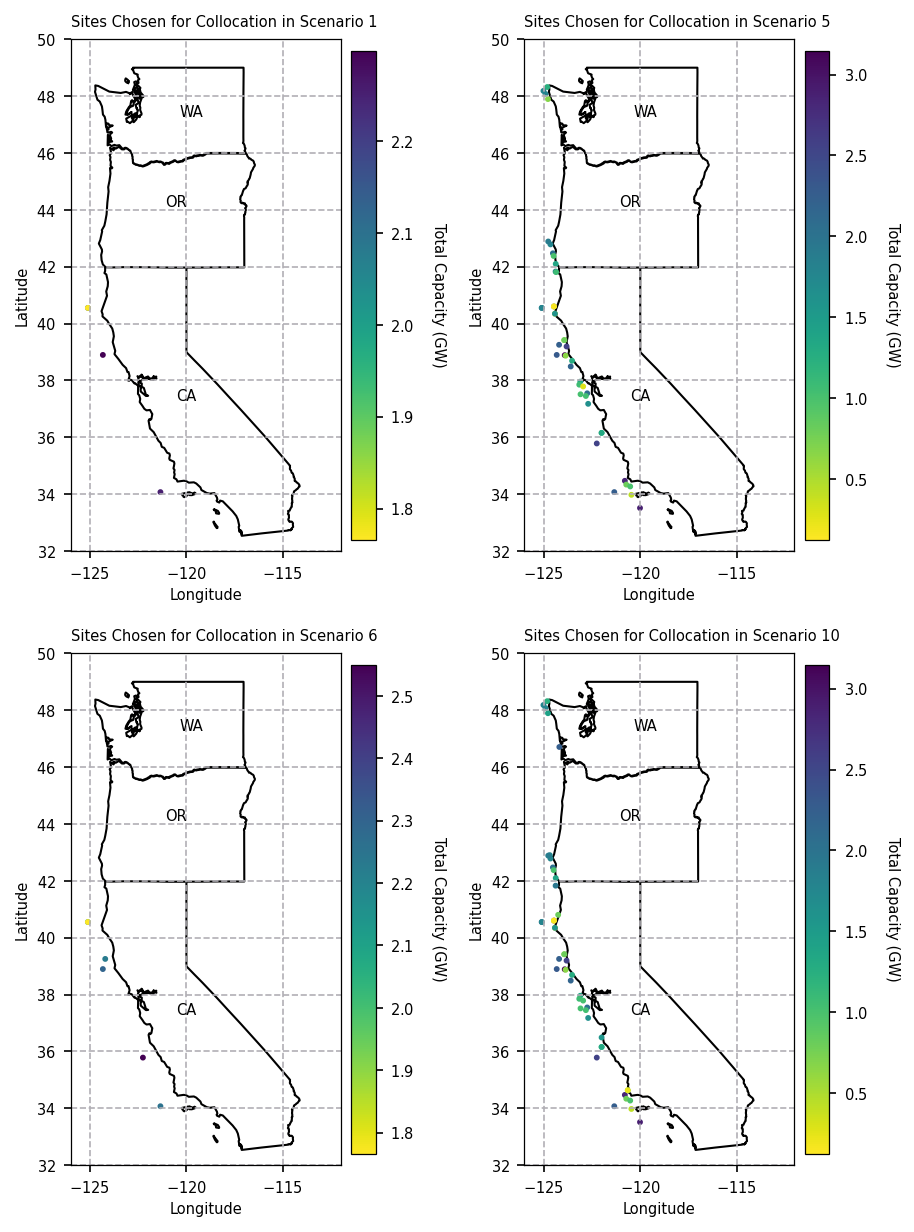

In [94]:
# Plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(6,8), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = s1['lon']
y = s1['lat']
a = s1['Total_GW'].min()
b = s1['Total_GW'].max()
s = ax1.scatter(x, y, c = s1['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Sites Chosen for Collocation in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = s5['lon']
y = s5['lat']
a = s5['Total_GW'].min()
b = s5['Total_GW'].max()
s = ax2.scatter(x, y, c = s5['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax2.set_xlabel('Longitude',fontsize=7)
ax2.set_ylabel('Latitude',fontsize=7)
ax2.set_ylim(32,50)
ax2.set_title('Sites Chosen for Collocation in Scenario 5')

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax3.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)

x = s6['lon']
y = s6['lat']
a = s6['Total_GW'].min()
b = s6['Total_GW'].max()
s = ax3.scatter(x, y, c = s6['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax3,fraction=0.07, pad=0.03)
ax3.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
ax3.set_ylabel('Latitude',fontsize=7)
ax3.set_ylim(32,50)
ax3.set_title('Sites Chosen for Collocation in Scenario 6')

# ax3.set_ylabel("Latitude")
# ax3.set_xlabel("Longitude")
ax3.grid(axis='y', linestyle='dashed')
ax3.grid(axis='x', linestyle='dashed')
#handles, labels = ax3.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax3.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax4.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)

x = s10['lon']
y = s10['lat']
a = s10['Total_GW'].min()
b = s10['Total_GW'].max()
s = ax4.scatter(x, y, c = s10['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax4,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax4.set_xlabel('Longitude',fontsize=7)
ax4.set_ylabel('Latitude',fontsize=7)
ax4.set_ylim(32,50)
ax4.set_title('Sites Chosen for Collocation in Scenario 10')

# ax4.set_ylabel("Latitude")
# ax4.set_xlabel("Longitude")
ax4.grid(axis='y', linestyle='dashed')
ax4.grid(axis='x', linestyle='dashed')
#handles, labels = ax4.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax4.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

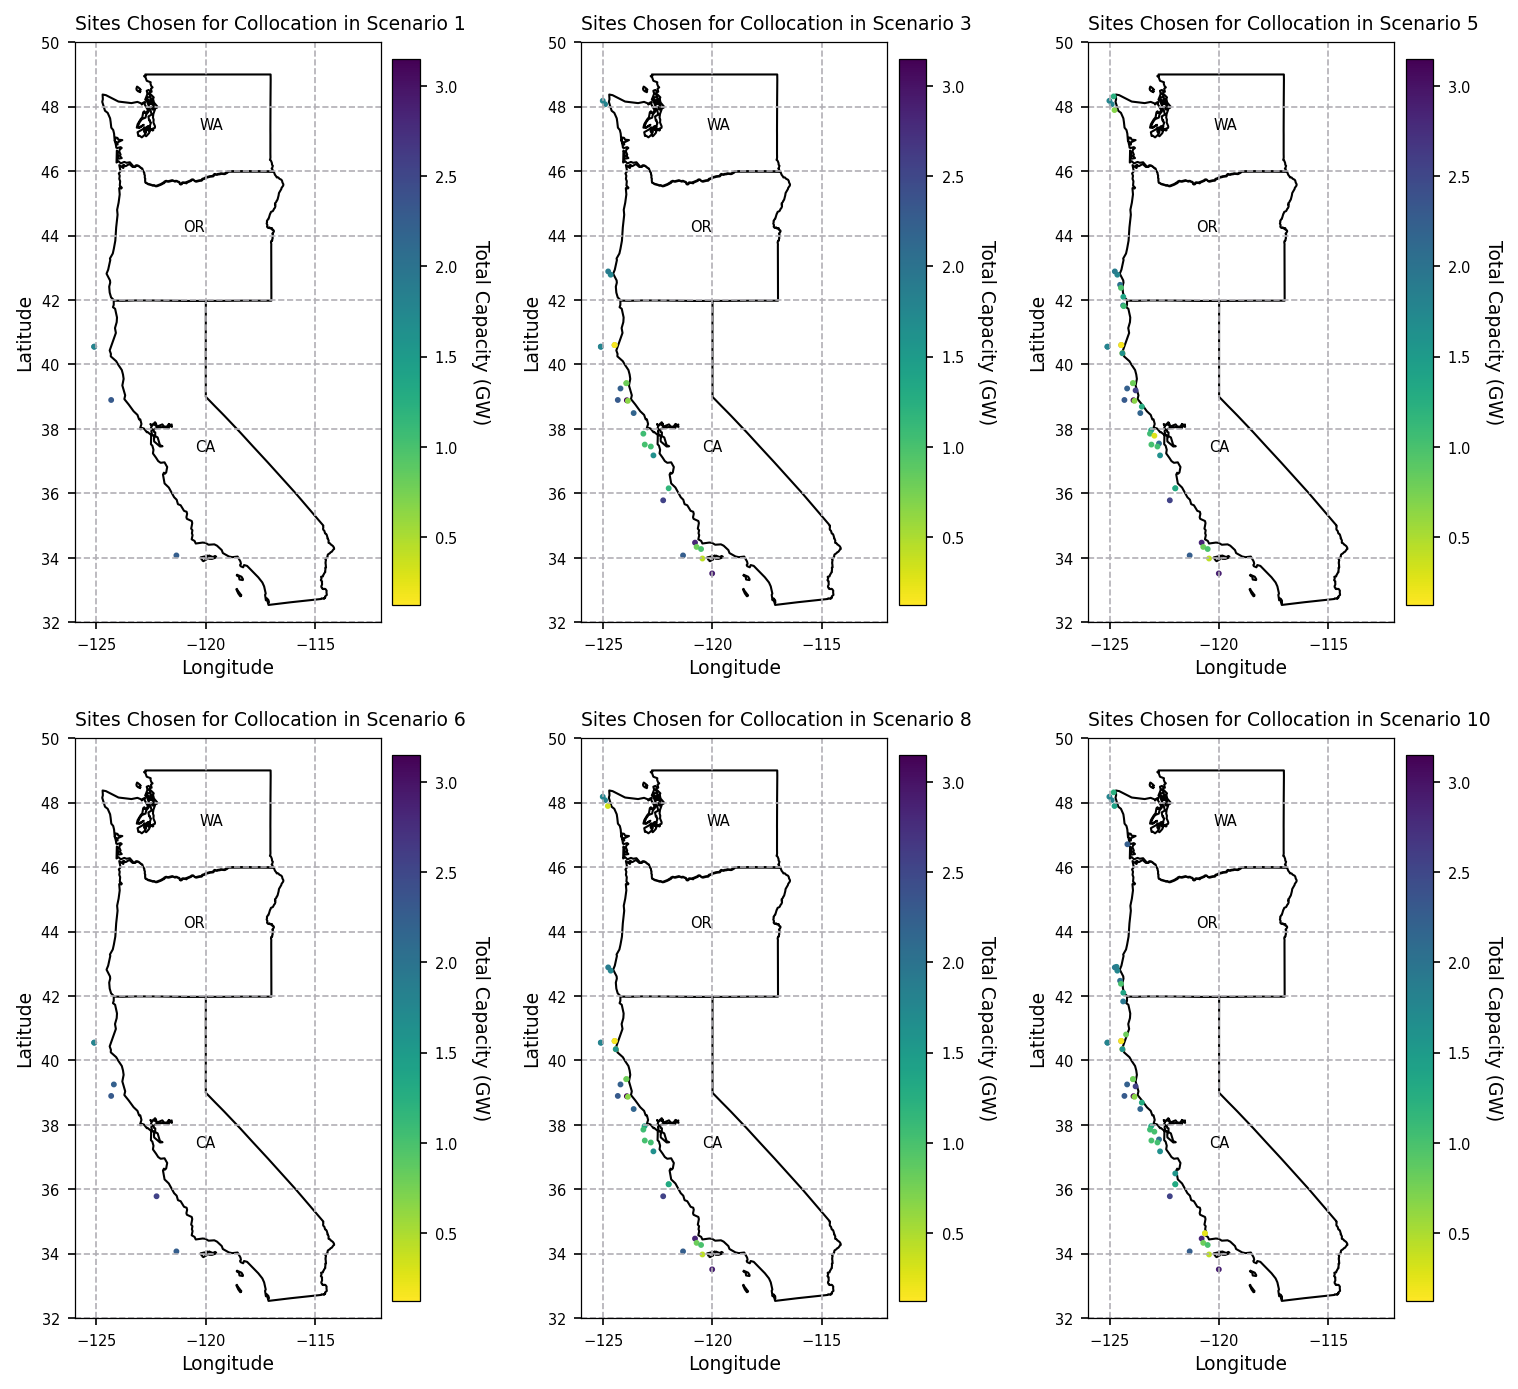

In [109]:
# Plot
fig, axs = plt.subplots(2,3,figsize=(10,9), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)
a = collocated_sites['Total_GW'].min()
b = collocated_sites['Total_GW'].max()

axs[0,0].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)

x = s1['lon']
y = s1['lat']
# a = s1['Total_GW'].min()
# b = s1['Total_GW'].max()
s = axs[0,0].scatter(x, y, c = s1['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,0],fraction=0.07, pad=0.03)
axs[0,0].set_xlabel('Longitude',fontsize=9)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
axs[0,0].set_ylabel('Latitude',fontsize=9)
axs[0,0].set_ylim(32,50)
axs[0,0].set_title('Sites Chosen for Collocation in Scenario 1',fontsize=9)
axs[0,0].grid(axis='y', linestyle='dashed')
axs[0,0].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,0].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[0,1].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)

x = s3['lon']
y = s3['lat']
# a = s3['Total_GW'].min()
# b = s3['Total_GW'].max()
s = axs[0,1].scatter(x, y, c = s3['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,1],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[0,1].set_xlabel('Longitude',fontsize=9)
axs[0,1].set_ylabel('Latitude',fontsize=9)
axs[0,1].set_ylim(32,50)
axs[0,1].set_title('Sites Chosen for Collocation in Scenario 3',fontsize=9)
axs[0,1].grid(axis='y', linestyle='dashed')
axs[0,1].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,1].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[0,2].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)

x = s5['lon']
y = s5['lat']
s = axs[0,2].scatter(x, y, c = s5['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,2],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[0,2].set_xlabel('Longitude',fontsize=9)
axs[0,2].set_ylabel('Latitude',fontsize=9)
axs[0,2].set_ylim(32,50)
axs[0,2].set_title('Sites Chosen for Collocation in Scenario 5',fontsize=9)
axs[0,2].grid(axis='y', linestyle='dashed')
axs[0,2].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,2].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,0].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)

x = s6['lon']
y = s6['lat']
# a = s6['Total_GW'].min()
# b = s6['Total_GW'].max()
s = axs[1,0].scatter(x, y, c = s6['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,0],fraction=0.07, pad=0.03)
axs[1,0].set_xlabel('Longitude',fontsize=9)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
axs[1,0].set_ylabel('Latitude',fontsize=9)
axs[1,0].set_ylim(32,50)
axs[1,0].set_title('Sites Chosen for Collocation in Scenario 6',fontsize=9)
axs[1,0].grid(axis='y', linestyle='dashed')
axs[1,0].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,0].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,1].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)

x = s8['lon']
y = s8['lat']
# a = s8['Total_GW'].min()
# b = s8['Total_GW'].max()
s = axs[1,1].scatter(x, y, c = s8['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,1],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[1,1].set_xlabel('Longitude',fontsize=9)
axs[1,1].set_ylabel('Latitude',fontsize=9)
axs[1,1].set_ylim(32,50)
axs[1,1].set_title('Sites Chosen for Collocation in Scenario 8',fontsize=9)
axs[1,1].grid(axis='y', linestyle='dashed')
axs[1,1].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,1].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,2].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)

x = s10['lon']
y = s10['lat']
# a = s10['Total_GW'].min()
# b = s10['Total_GW'].max()
s = axs[1,2].scatter(x, y, c = s10['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,2],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[1,2].set_xlabel('Longitude',fontsize=9)
axs[1,2].set_ylabel('Latitude',fontsize=9)
axs[1,2].set_ylim(32,50)
axs[1,2].set_title('Sites Chosen for Collocation in Scenario 10',fontsize=9)
axs[1,2].grid(axis='y', linestyle='dashed')
axs[1,2].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,2].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

plt.savefig(folder_to_save_results+"Sites Chosen for Collocation by Scenario.png", transparent=False)

Text(0, 0.5, 'Latitude')

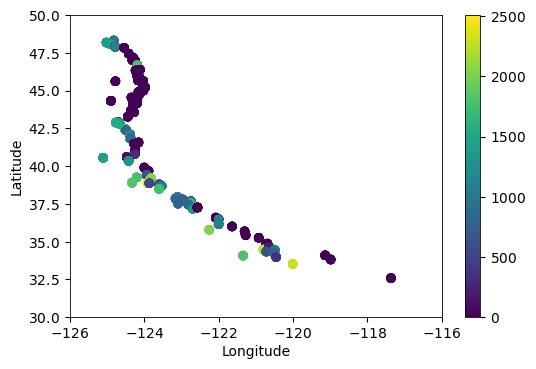

In [ ]:
x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
s = plt.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis")
c = plt.colorbar()
a = gen_cap_osw['GenCapacity'].min()
b = gen_cap_osw['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


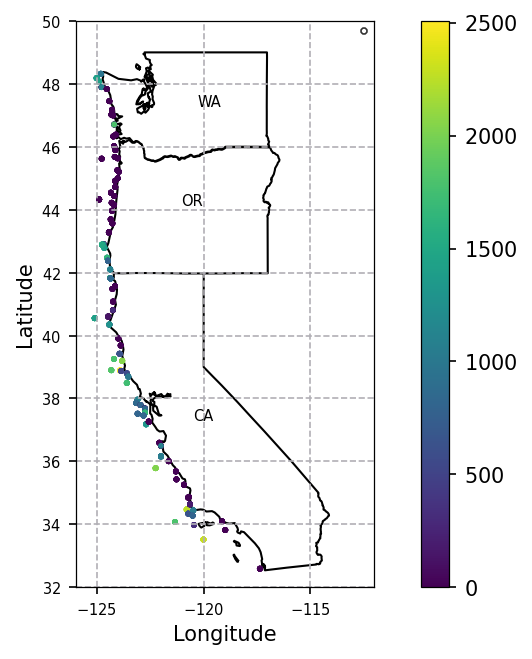

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), dpi=150)
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)
ax.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)

x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
s = plt.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis",s=4)
c = plt.colorbar()
a = gen_cap_osw['GenCapacity'].min()
b = gen_cap_osw['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(32,50)

# ax.set_ylabel("Latitude")
# ax.set_xlabel("Longitude")
ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=7,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)
for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax=plt.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


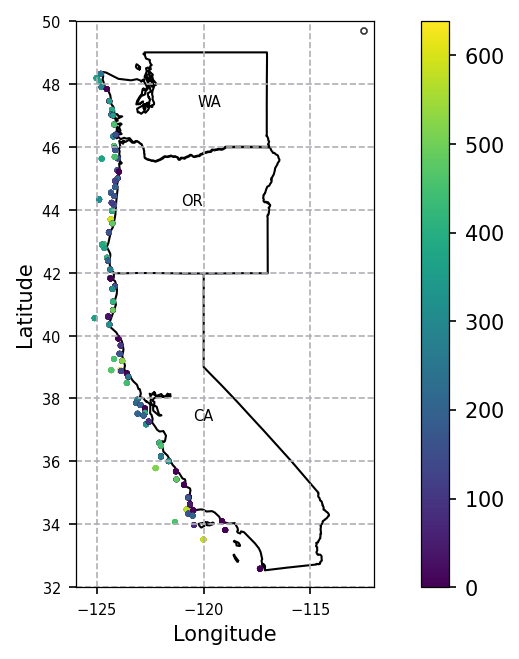

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), dpi=150)
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)
ax.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
s = plt.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis",s=4)
c = plt.colorbar()
a = gen_cap_wave['GenCapacity'].min()
b = gen_cap_wave['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(32,50)

# ax.set_ylabel("Latitude")
# ax.set_xlabel("Longitude")
ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=7,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)
for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax=plt.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

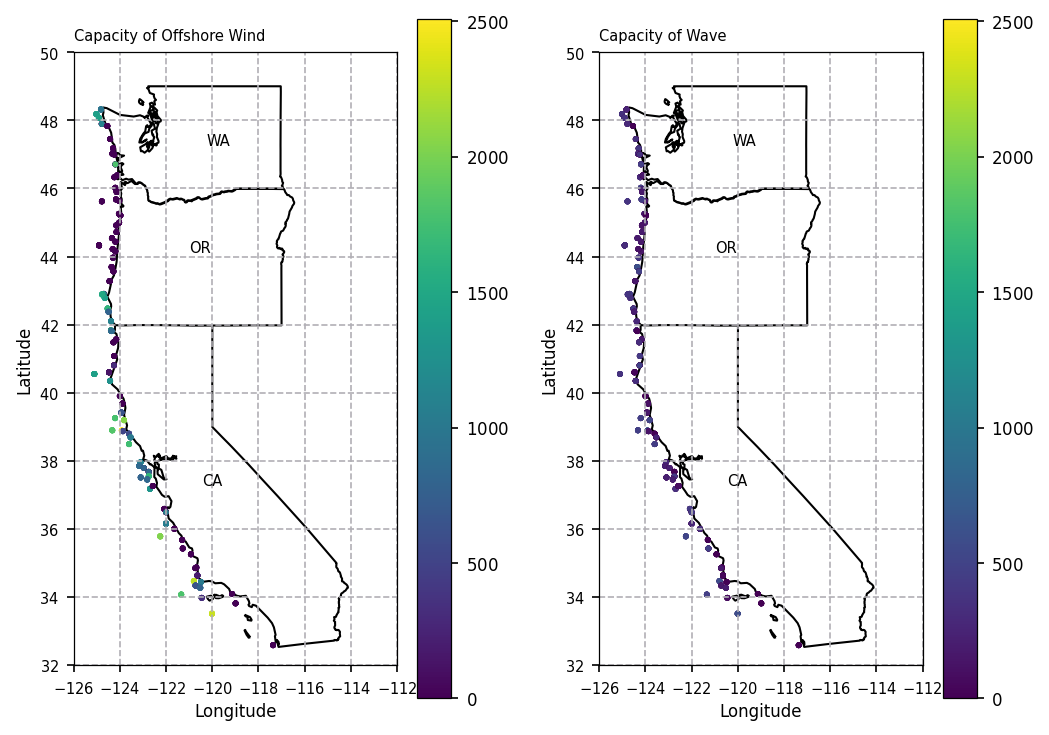

In [ ]:
# Plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6), dpi=150)
fig.subplots_adjust(wspace=.3)
fig.patch.set_facecolor('white')

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
a = gen_cap_osw_wave['GenCapacity'].min()
b = gen_cap_osw_wave['GenCapacity'].max()
s = ax1.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1)
ax1.set_xlabel('Longitude',fontsize=8)
ax1.set_ylabel('Latitude',fontsize=8)
ax1.set_ylim(32,50)
ax1.set_title('Capacity of Offshore Wind')
cbar.ax.tick_params(labelsize=8)

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
a = gen_cap_osw_wave['GenCapacity'].min()
b = gen_cap_osw_wave['GenCapacity'].max()
s = ax2.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2)
ax2.set_xlabel('Longitude',fontsize=8)
ax2.set_ylabel('Latitude',fontsize=8)
ax2.set_ylim(32,50)
ax2.set_title('Capacity of Wave')
cbar.ax.tick_params(labelsize=8)

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [ ]:
ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
a = gen_cap_wave['GenCapacity'].min()
b = gen_cap_wave['GenCapacity'].max()
s = ax2.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis", s=4, clim=(a, b))
cbar = fig.colorbar(s,ax=ax2)
ax2.set_xlabel('Longitude',fontsize=8)
ax2.set_ylabel('Latitude',fontsize=8)
ax2.set_ylim(32,50)
cbar.ax.tick_params(labelsize=8)

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

<Figure size 600x400 with 0 Axes>